#**Tugas Project Based**
## **Pembelajaran Mesin**
**Kelas : IF-44-09**

**Anggota :**
1. Razita Amalina (1301200283)
2. Gayuh Putri Andyani (1301204050)
3. Yunolva Anis R. (1301204096)
4. Aufa Mutia (1301204233)

# Formulasi Masalah

German Credit merupakan sebuah dataset yang didalamnya memiliki 20 variabel termasuk personal dan dan kondisi finansial dari individual yang telah mengajukan credit card. 
Tujuan dari analisis dataset ini adalah untuk membangun sebuah model yang dapat memprediksi apakah sesorang memiliki potensi untuk mendapatkan approval dalam menggunakan credit card berdasarkan dari karakteristik finansial dan personalnya.

# Eksplorasi dan Pra-pemrosesan Data

Import Library 

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import plot_confusion_matrix

Import Dataset

In [ ]:
!gdown --id 111owqrDac9nLHYpFPgjI1TD_t_Fju_eD
df = pd.read_excel("german_credit.xls")
df.head()

/usr/local/lib/python3.8/dist-packages/gdown/cli.py:127: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=111owqrDac9nLHYpFPgjI1TD_t_Fju_eD
To: /content/german_credit.xls
100% 346k/346k [00:00<00:00, 107MB/s]


,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2023-02-03 00:00:00,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2023-02-03 00:00:00,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2023-02-03 00:00:00,unskilled - resident,0 to 2,no,yes,good


1. Find the Missing Value

In [ ]:
missingValue = df.isnull()
missingValue = missingValue.sum()
missingValue

status                     0
duration                   0
credit_history             0
purpose                    0
amount                     0
savings                    0
employment_duration        0
installment_rate           0
personal_status_sex        0
other_debtors              0
present_residence          0
property                   0
age                        0
other_installment_plans    0
housing                    0
number_credits             0
job                        0
people_liable              0
telephone                  0
foreign_worker             0
credit_risk                0
dtype: int64

2. Encoding

In [ ]:
# Select the categorical column
status = df['status']
credit_hist = df['credit_history']
purposebis = df['purpose']
savingsenc = df['savings']
instalrate = df['installment_rate']
personalstat = df['personal_status_sex']
otherdebtors = df['other_debtors']
presentresidence = df['present_residence']
prop = df['property']
ageenc = df['age']
otherinstallment = df['other_installment_plans']
housingenco = df['housing']
jobenco = df['job']
peopleliable = df['people_liable']
telephoneenco = df['telephone']
foreignworker = df['foreign_worker']
credithist = df['credit_history']
employeementduration = df['employment_duration']
creditriskenco = df['credit_risk']


# Integer encode the column
label_encoder = LabelEncoder()
status_transformed = label_encoder.fit_transform(status)
credit_transformed = label_encoder.fit_transform(credit_hist)
purpos_trans = label_encoder.fit_transform(purposebis)
saving_trans = label_encoder.fit_transform(savingsenc)
instalrate_trans = label_encoder.fit_transform(instalrate)
personalstat_trans = label_encoder.fit_transform(personalstat)
otherdebtors_trans = label_encoder.fit_transform(otherdebtors)
presentresidence_trans = label_encoder.fit_transform(presentresidence)
prop_trans = label_encoder.fit_transform(prop)
age_trans = label_encoder.fit_transform(ageenc)
otherinstallment_trans = label_encoder.fit_transform(otherinstallment)
housingenco_trans = label_encoder.fit_transform(housingenco)
jobenco_trans = label_encoder.fit_transform(jobenco)
peopleliable_trans = label_encoder.fit_transform(peopleliable)
telephoneenco_trans = label_encoder.fit_transform(telephoneenco)
foreignworker_trans = label_encoder.fit_transform(foreignworker)
credithist_trans = label_encoder.fit_transform(credithist)
employeementduration_trans = label_encoder.fit_transform(employeementduration)
creditrisk_trans = label_encoder.fit_transform(creditriskenco)

# Update the original DataFrame with the encoded data
df['status'] = status_transformed
df['credit_history'] = credit_transformed
df['purpose'] = purpos_trans
df['savings'] = saving_trans
df['installment_rate'] = instalrate_trans
df['personal_status_sex'] = personalstat_trans
df['other_debtors'] = otherdebtors_trans
df['present_residence'] = presentresidence_trans
df['property'] = prop_trans
df['age'] = age_trans
df['other_installment_plans'] = otherinstallment_trans
df['housing'] = housingenco_trans
df['job'] = jobenco_trans
df['people_liable'] = peopleliable_trans
df['telephone'] = telephoneenco_trans
df['foreign_worker'] = foreignworker_trans
df['credit_history'] = credithist_trans
df['employment_duration'] = employeementduration_trans
df['credit_risk'] = creditrisk_trans
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,0,2,1049,4,2,2,0,2,...,1,2,1,0,1,1,0,0,0,1
1,3,9,0,5,2799,4,0,1,3,2,...,3,17,1,0,2023-02-03 00:00:00,1,1,0,0,1
2,0,12,4,8,841,0,1,1,0,2,...,3,4,1,0,1,3,0,0,0,1
3,3,12,0,5,2122,4,0,0,3,2,...,3,20,1,0,2023-02-03 00:00:00,3,1,0,1,1
4,3,12,0,5,2171,4,0,2,3,2,...,1,19,0,2,2023-02-03 00:00:00,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,4,4,1987,4,0,1,3,2,...,3,2,1,0,1,3,1,0,0,0
996,3,24,4,5,2303,4,3,2,3,0,...,3,26,1,2,1,1,0,0,0,0
997,1,21,0,5,12680,1,3,2,3,2,...,2,11,1,1,1,0,0,1,0,0
998,0,12,4,4,6468,1,4,1,3,2,...,2,33,1,2,1,0,0,1,0,0


In [ ]:
df = df.drop('number_credits', axis=1)
df

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,present_residence,property,age,other_installment_plans,housing,job,people_liable,telephone,foreign_worker,credit_risk
0,3,18,0,2,1049,4,2,2,0,2,3,1,2,1,0,1,0,0,0,1
1,3,9,0,5,2799,4,0,1,3,2,0,3,17,1,0,1,1,0,0,1
2,0,12,4,8,841,0,1,1,0,2,3,3,4,1,0,3,0,0,0,1
3,3,12,0,5,2122,4,0,0,3,2,0,3,20,1,0,3,1,0,1,1
4,3,12,0,5,2171,4,0,2,3,2,3,1,19,0,2,3,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,24,4,4,1987,4,0,1,3,2,3,3,2,1,0,3,1,0,0,0
996,3,24,4,5,2303,4,3,2,3,0,2,3,26,1,2,1,0,0,0,0
997,1,21,0,5,12680,1,3,2,3,2,3,2,11,1,1,0,0,1,0,0
998,0,12,4,4,6468,1,4,1,3,2,2,2,33,1,2,0,0,1,0,0


2. Find The Correlation Between Two Column with Matrix Plot

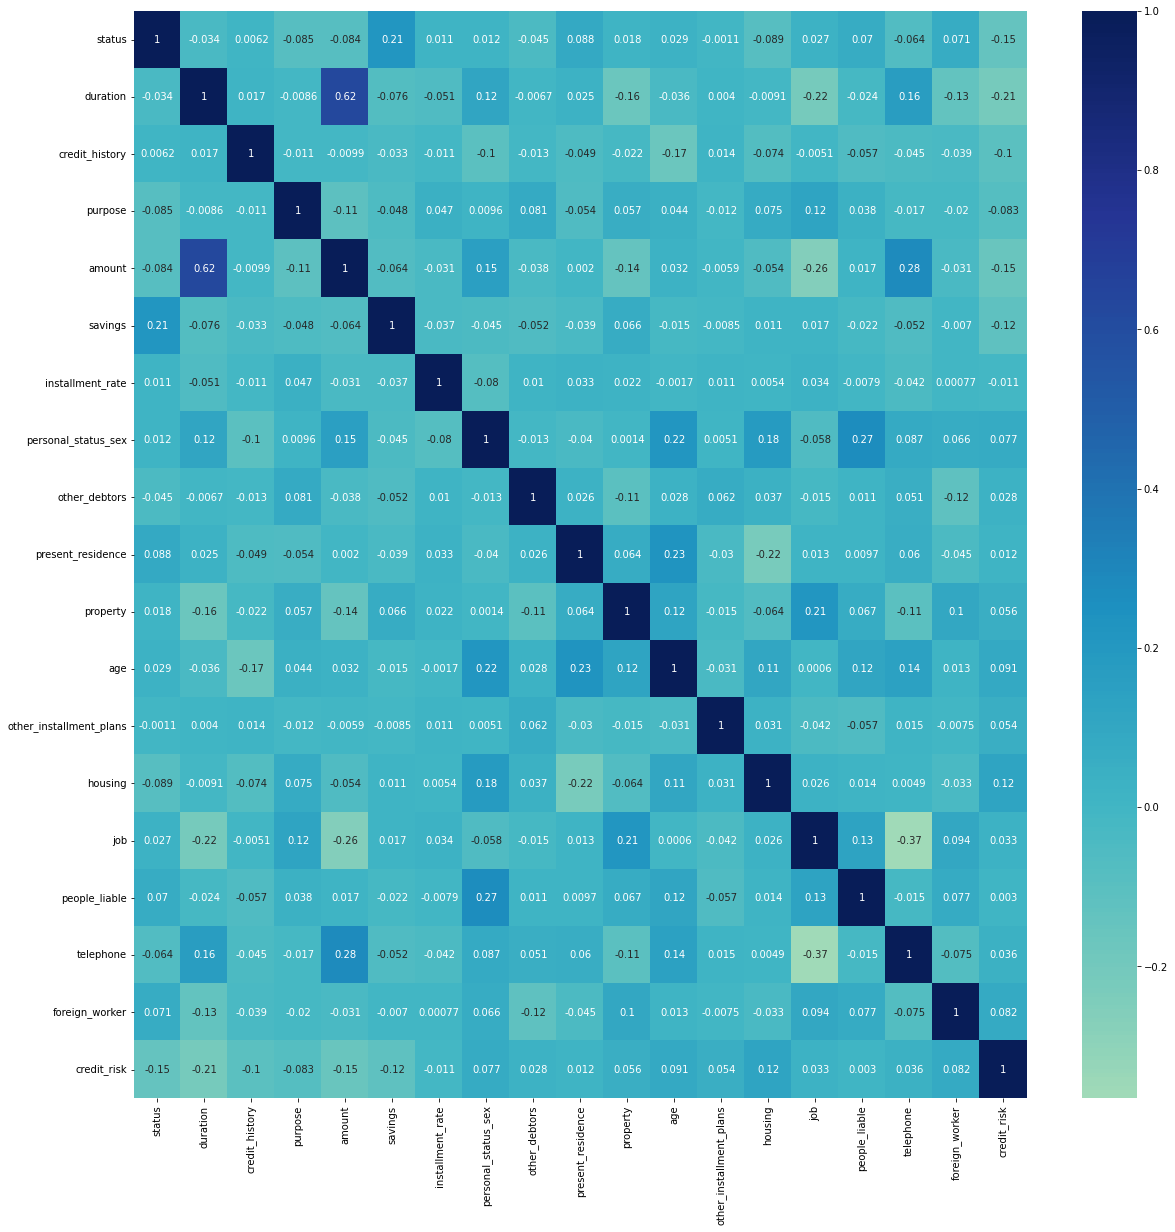

In [ ]:
# Find the Corellations These Columns
corr_val = df[['status','duration','credit_history','purpose', 'amount','savings','installment_rate','personal_status_sex','other_debtors','present_residence','property','age','other_installment_plans','housing','job','people_liable','telephone','foreign_worker','credit_risk']].corr()
plt.figure(figsize=(20,20))
sns.heatmap(corr_val, annot=True, cmap="YlGnBu", center=0)

3. Pair Plot

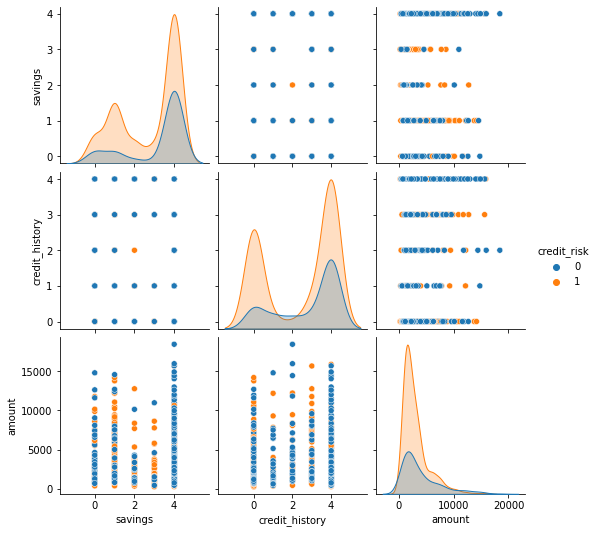

In [ ]:
sns.pairplot(df[['savings','credit_history','amount','credit_risk']], hue='credit_risk')
plt.show()

Other

In [ ]:
from sklearn.preprocessing import StandardScaler

# Credit Risk as Y
y = df['credit_risk']

# Drop The "Credit Risk" Column  on X
x = df.drop(['credit_risk'], axis=1)

# Scalling Data
scaler = StandardScaler()
scaler.fit(x)
x = scaler.transform(x)

# Data Spliting
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.1, random_state = 123)

# Pemodelan

In [ ]:
# Define the Base Estimator and Number of Base Estimator That are Trained in The Model
AB = AdaBoostClassifier(n_estimators=10)

# Train Model on the Training Data
AB.fit(x_train, y_train)

AdaBoostClassifier(n_estimators=10)

In [ ]:
#Score of Training Model 
AB.score(x_train, y_train)

0.7588888888888888

In [ ]:
AB.score(x_test, y_test)

0.7

# Evaluasi

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

# Make Predictions on The Test Data
y_predict= AB.predict(x_test)

#Compute the accuracy 
accuracy = accuracy_score(y_test, y_predict)
print("Accuracy : ",accuracy)

# Compute the precision
precision = precision_score(y_test, y_predict)
print(f'Precision: {precision:.2f}')

# Compute the recall
recall = recall_score(y_test, y_predict)
print(f'Recall: {recall:.2f}')

# Compute the F1 score
f1 = f1_score(y_test, y_predict)
print(f'F1: {f1:.2f}')

# Change Numeric Into Categorical
y_predictconv = np.array(['Bad' if x == 0 else 'Good' for x in y_predict])
y_testconv = np.array(['Bad' if x == 0 else 'Good' for x in y_test])

df_predict = pd.DataFrame({'y_pred':y_predictconv, 'y_test':y_testconv})
print(df_predict)


Accuracy :  0.7
Precision: 0.76
Recall: 0.83
F1: 0.79
   y_pred y_test
0    Good   Good
1    Good   Good
2    Good   Good
3     Bad   Good
4    Good   Good
..    ...    ...
95    Bad    Bad
96   Good    Bad
97   Good    Bad
98    Bad    Bad
99   Good   Good

[100 rows x 2 columns]


In [ ]:
# Get the unique values in the credit_risk column
credit_risk = df['credit_risk'].unique()

conf_matrix = pd.DataFrame(confusion_matrix(y_test, y_predict), 
                                     columns=credit_risk, 
                                     index=credit_risk)

conf_matrix

,1,0
1,12,18
0,12,58


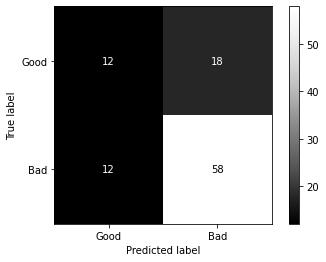

In [ ]:
# Create heatmap for AB confusion matrix
import warnings
plot_confusion_matrix(AB, x_test, y_test, display_labels=['Good', 'Bad'],  cmap = "Greys_r")

warnings.filterwarnings("ignore", category=FutureWarning) # To hide the warning module 

plt.show()


In [ ]:
print('{0} accuracy = {1:.4f}'.format("AdaptiveBoosting", accuracy_score(y_test, y_predict)))

AdaptiveBoosting accuracy = 0.7000


# Eksperimen

In [ ]:
# Experiment with Bagging Classifier

# Define the Bagging Classifier
Bagging = BaggingClassifier(base_estimator=None, n_estimators=100, max_samples=0.2, max_features=0.5,
                        bootstrap=True, bootstrap_features=False, n_jobs=None, random_state=42)

# Fit the Classifier
Bagging.fit(x_train, y_train)

BaggingClassifier(max_features=0.5, max_samples=0.2, n_estimators=100,
                  random_state=42)

In [ ]:
Bagging.score(x_train, y_train)

0.8666666666666667

In [ ]:
Bagging.score(x_test, y_test)

0.73

Accuracy Score :  0.73


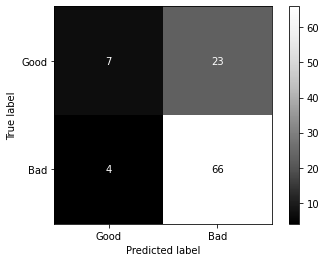

In [ ]:
import warnings

# Make prediction with x_test
y_predictBagging = Bagging.predict(x_test)

# Count the Accuracy Score
accuracyBagging = accuracy_score(y_test, y_predictBagging)
print("Accuracy Score : ", accuracyBagging)

# Plot the Confusion Matrix 
plot_confusion_matrix(Bagging, x_test, y_test, display_labels=['Good', 'Bad'], cmap = "Greys_r")

warnings.filterwarnings("ignore", category=FutureWarning) # To hide the warning module 

# Show the Confusion Matrix Plot
plt.show()

In [ ]:
# Show the Prediction

y_predictBaggingCONV = np.array(['Bad' if x == 0 else 'Good' for x in y_predictBagging])
y_testBaggingCONV = np.array(['Bad' if x == 0 else 'Good' for x in y_test])


# Show the Prediction output
df_predict = pd.DataFrame({'y_pred':y_predictBaggingCONV, 'y_test':y_testBaggingCONV})
print(df_predict)

   y_pred y_test
0    Good   Good
1    Good   Good
2    Good   Good
3    Good   Good
4    Good   Good
..    ...    ...
95   Good    Bad
96   Good    Bad
97   Good    Bad
98    Bad    Bad
99   Good   Good

[100 rows x 2 columns]
